<a href="https://colab.research.google.com/github/nikhil4859/Machine-learning/blob/main/Diamond_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diamond Price Prediction - Linear Model

*Gem Stones co ltd, a cubic zirconia manufacturer, has provided a dataset containing the prices and other attributes of almost 27,000 cubic zirconia. The company wants to predict the price of the stone based on the given details to distinguish between higher profitable stones and lower profitable stones. The aim of this project is to develop a machine learning model that can accurately predict the price of the cubic zirconia, which will help the company in identifying the most profitable stones and thus increase their profits. Additionally, we will identify the top 5 attributes that are most important in predicting the price of cubic zirconia.*

We will be going by the below mentioned steps:

1.   Data collection and cleaning
2.   Exploratory Data Analysis
3.   Feature Selection
4.   Splitting the data
5.   Training the Model
6.   Model Evaluation
7.   Model Tuning
8.   List item
9.   Interpret the model
10.  Predictions

#### Data Collection and Cleaning

In [202]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt #importing important libraries

In [203]:
from google.colab import drive
drive.mount('/content/drive') #mounting the drive to Google Colab

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [204]:
%cd /content/drive/MyDrive/Datasets 

/content/drive/MyDrive/Datasets


In [205]:
df=pd.read_csv('cubic_zirconia.csv') #loading the data set

In [206]:
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...,...
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


Data Dictionary

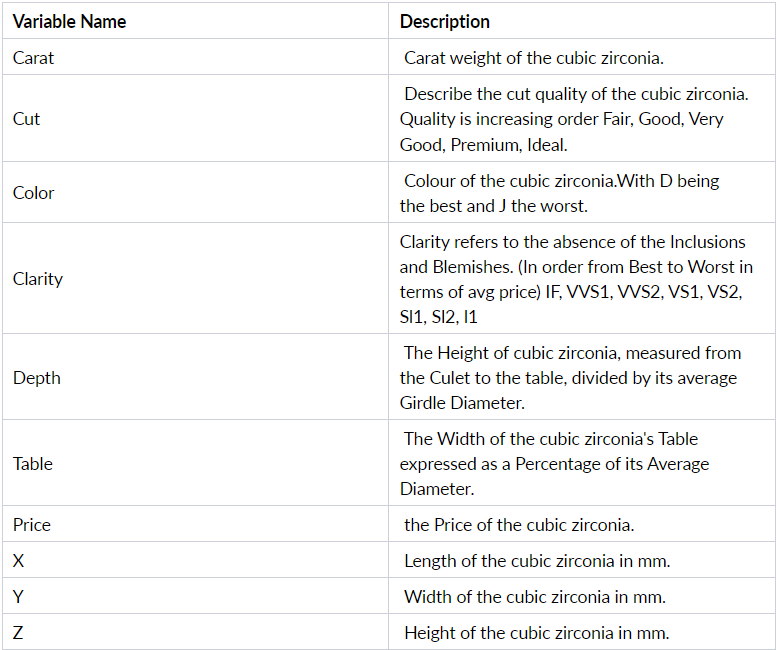

In [207]:
df.shape

(26967, 11)

In [208]:
df.drop('Unnamed: 0', inplace = True, axis = 1) #dropped the unnecessary column from the dataset

In [209]:
df #checking the data frame

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...
26962,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


In [210]:
df.describe().T #checking desription of the dataset

,count,mean,std,min,25%,50%,75%,max
carat,26967.0,0.798375,0.477745,0.2,0.40,0.70,1.05,4.50
depth,26270.0,61.745147,1.412860,50.8,61.00,61.80,62.50,73.60
table,26967.0,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.518115,4024.864666,326.0,945.00,2375.00,5360.00,18818.00


❗Seems like there are some missing values in the depth column of the data set



❗Also we can see that there are values as 0 in x, y, z columns of the dataset, which represents length width and height of the diamond and it can not be 0. We will have to check all such record





In [211]:
df.drop_duplicates() #dropped the duplicate values

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...
26962,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


In [212]:
df.describe() #checking description after dropping the duplicate values. 

,carat,depth,table,x,y,z,price
count,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [213]:
df.isnull().sum() #Checking missing values

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

<Axes: >

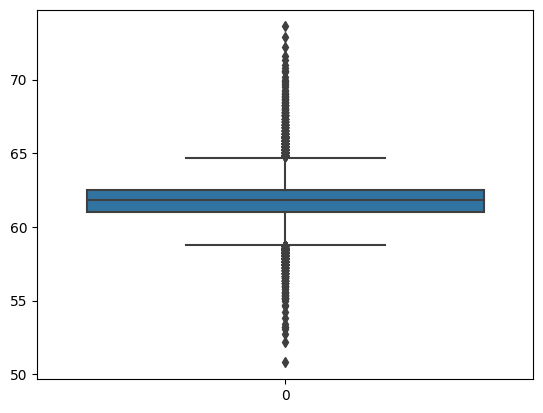

In [214]:
sns.boxplot(df['depth'])

In [215]:
df = df.fillna(df.median())

<ipython-input-215-a187aa03e3ee>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.median())


In [216]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [217]:
df[(df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0)] #checking the rows with 0 values in any of the column amongst x, y, z

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
6215,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
10827,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


In [218]:
drop = df[(df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0)].index #here we have taken out the index of all the values having 0 in x or y or z an stored in drop assignment

In [219]:
df.drop(drop[0:], inplace=True) #we have dropped all the selected index from the drop assignment

In [220]:
df.reset_index(inplace=True) #We have reset the index here.

In [221]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,26958.0,13483.289524,7785.384674,0.00,6742.2500,13484.50,20225.75,26966.00
carat,26958.0,0.798190,0.477602,0.20,0.4000,0.70,1.05,4.50
depth,26958.0,61.746758,1.394043,50.80,61.1000,61.80,62.50,73.60
table,26958.0,57.455342,2.231227,49.00,56.0000,57.00,59.00,79.00
x,26958.0,5.730105,1.126714,3.73,4.7100,5.69,6.55,10.23
y,26958.0,5.733832,1.164342,3.71,4.7125,5.70,6.54,58.90
z,26958.0,3.539238,0.717838,1.07,2.9000,3.52,4.04,31.80
price,26958.0,3938.311262,4023.359737,326.00,945.0000,2375.00,5358.00,18818.00


In [222]:
df.drop('index', inplace = True, axis = 1)

In [223]:
df

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...
26953,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26954,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26955,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26956,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


In [224]:
df.describe()

,carat,depth,table,x,y,z,price
count,26958.000000,26958.000000,26958.000000,26958.000000,26958.000000,26958.000000,26958.000000
mean,0.798190,61.746758,57.455342,5.730105,5.733832,3.539238,3938.311262
std,0.477602,1.394043,2.231227,1.126714,1.164342,0.717838,4023.359737
min,0.200000,50.800000,49.000000,3.730000,3.710000,1.070000,326.000000
25%,0.400000,61.100000,56.000000,4.710000,4.712500,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5358.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


✅We have treated the missing value and have dropped the columns containing 0 in x, y and z

#### Exploratory Data Analysis and Feature Selection



In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26958 entries, 0 to 26957
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26958 non-null  float64
 1   cut      26958 non-null  object 
 2   color    26958 non-null  object 
 3   clarity  26958 non-null  object 
 4   depth    26958 non-null  float64
 5   table    26958 non-null  float64
 6   x        26958 non-null  float64
 7   y        26958 non-null  float64
 8   z        26958 non-null  float64
 9   price    26958 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


<Axes: xlabel='cut', ylabel='price'>

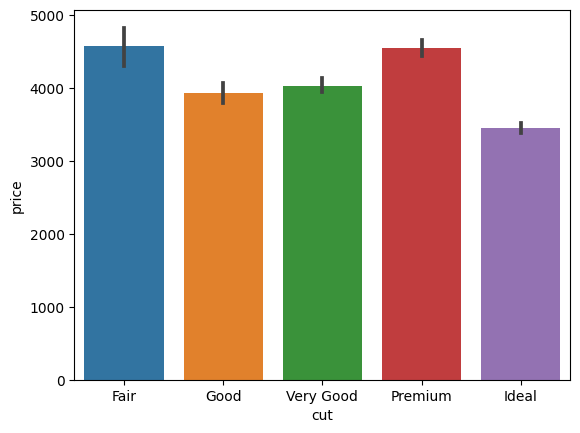

In [226]:
sns.barplot(data = df, x = df['cut'], y = df['price'], order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])

<Axes: xlabel='color', ylabel='price'>

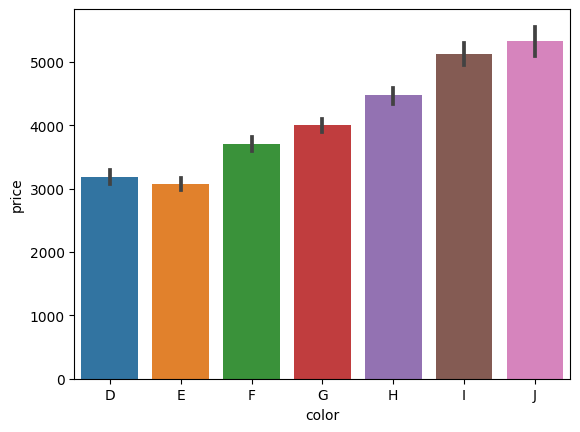

In [227]:
sns.barplot(data = df, x = df['color'], y = df['price'], order = ['D', 'E', 'F', 'G', 'H', 'I', 'J'])

<Axes: xlabel='clarity', ylabel='price'>

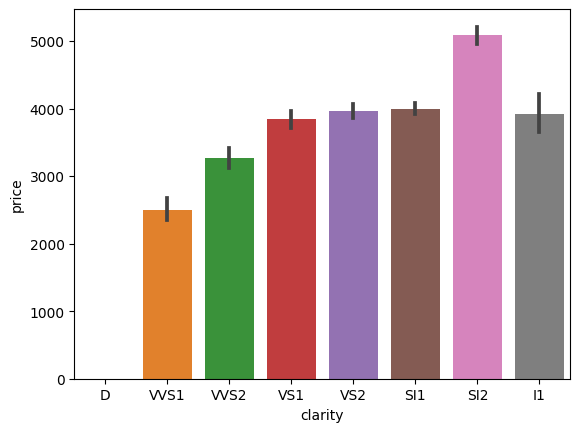

In [228]:
sns.barplot(data = df, y = df['price'], x = df['clarity'], order = ['D', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1'])

We can see that we can combine Good and Very Good in one as they have similar mean with no major difference, similar the case with VS1 and VS2 clarity and D and E color 

In [229]:
df['cut'] = df['cut'].replace({'Very Good': 'Good_Very_Good', 'Good': 'Good_Very_Good'})

In [230]:
df['clarity'] = df['clarity'].replace({'VS1': 'VS1_VS2', 'VS2': 'VS1_VS2'})

In [231]:
df['color'] = df['color'].replace({'D': 'D_E', 'E': 'D_E', 'F' : 'F_G', 'G' : 'F_G'})

<ipython-input-232-470153ef861c>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], ax=axs[1][i], fit=norm, kde=False)
<ipython-input-232-470153ef861c>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], ax=axs[1][i], fit=norm, kde=False)
<ipython-input-232-470153ef861c>:13: UserW

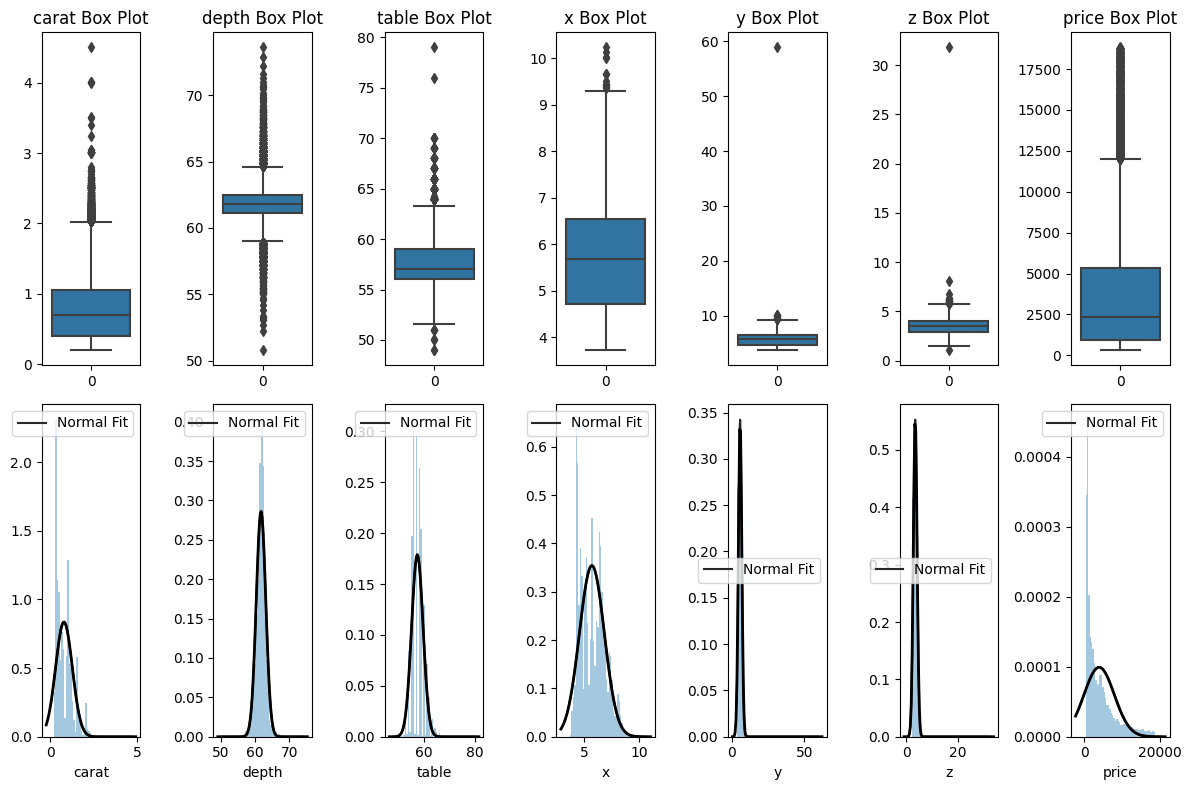

In [232]:
from scipy.stats import norm

# Selecting the non-object columns
cols = df.select_dtypes(exclude='object').columns

# Creating a subplot with the same number of rows and columns as the number of columns to plot
fig, axs = plt.subplots(nrows=2, ncols=len(cols), figsize=(12, 8))

# Looping through the columns and plotting a box plot and a frequency distribution plot for each column
for i, col in enumerate(cols):
    sns.boxplot(df[col], ax=axs[0][i])
    axs[0][i].set_title(f'{col} Box Plot')
    sns.distplot(df[col], ax=axs[1][i], fit=norm, kde=False)
    mean, std = norm.fit(df[col])
    xmin, xmax = axs[1][i].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mean, std)
    axs[1][i].plot(x, p, 'k', linewidth=2)
    axs[1][i].legend(['Normal Fit'])

# Displaying the plot
plt.tight_layout()
plt.show()

♦ We can see carat is left skewed, depth  seems to be normally distributed.

♦ y and z is left skewed.

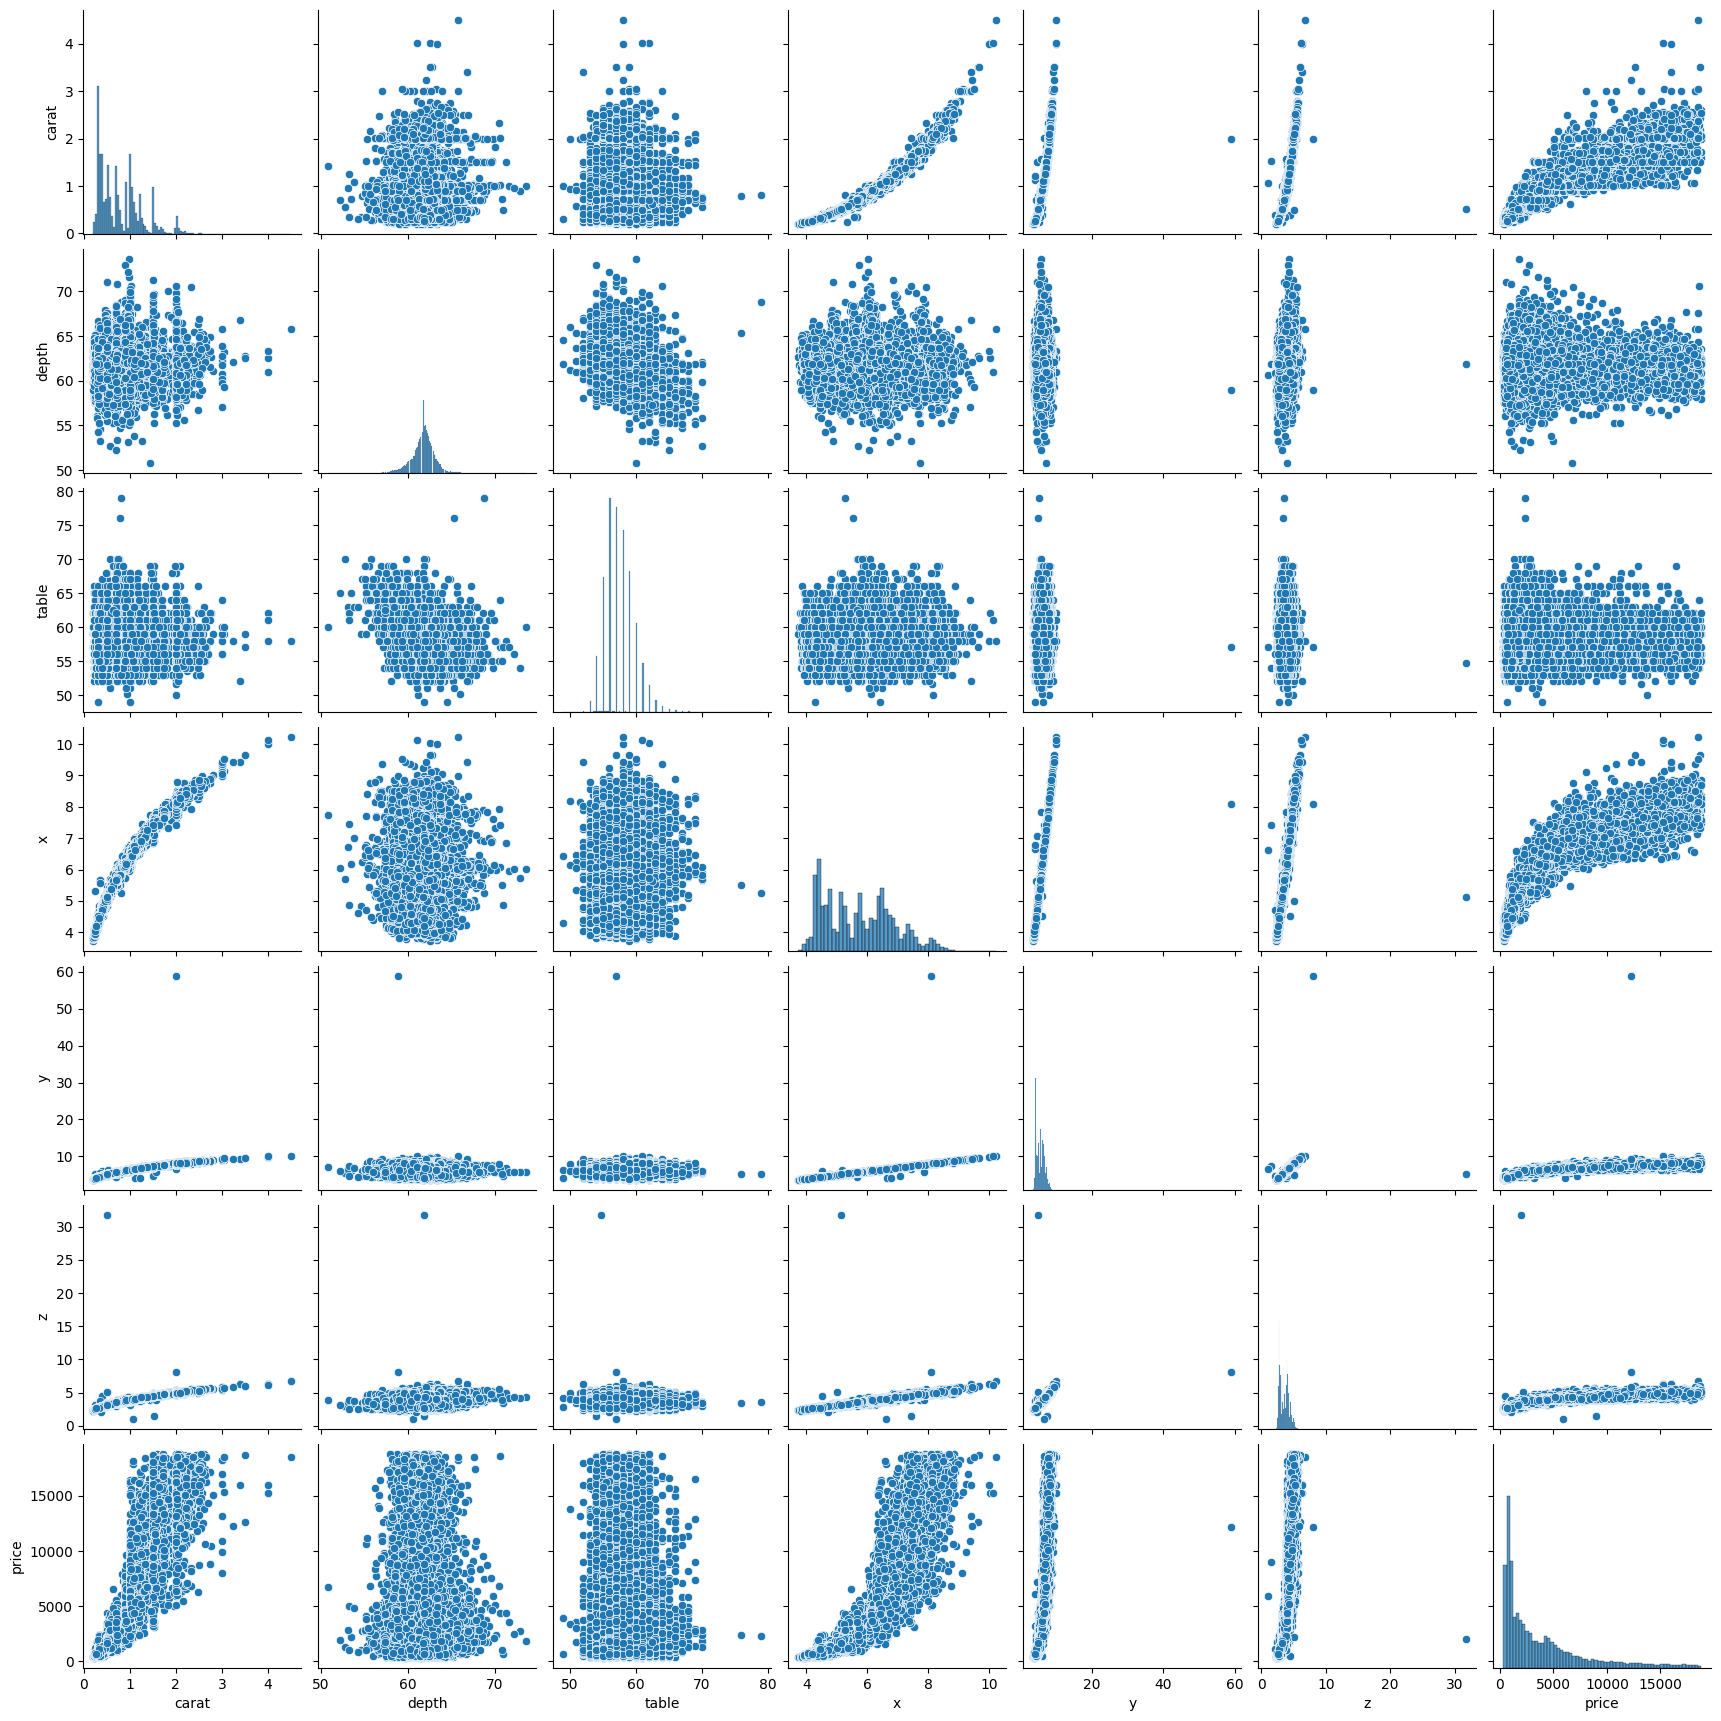

In [233]:
sns.pairplot(df)

<ipython-input-234-fe43fffaf13b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

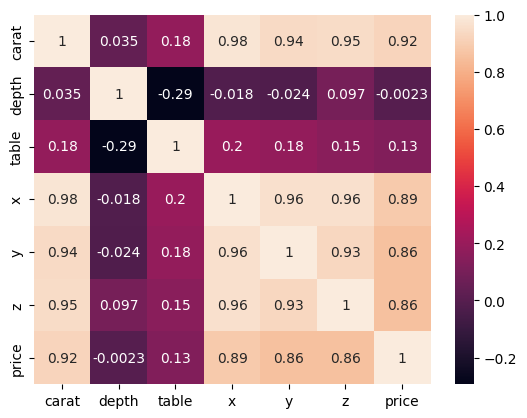

In [234]:
sns.heatmap(df.corr(), annot = True)

We can see all the three variable have an order, so we will have to proceed with Ordinal Encoding here. 

In [235]:
mapping_clarity = {'IF': 6, 'VVS1': 5, 'VVS2': 4, 'VS1_VS2': 3, 'SI1': 2, 'SI2': 1, 'I1': 0}

In [236]:
df['clarity'] = df['clarity'].map(mapping_clarity)

In [237]:
mapping_color = {'J': 4, 'I': 3, 'H': 2, 'F_G': 1, 'D_E': 0}

In [238]:
df['color'] = df['color'].map(mapping_color)

In [239]:
mapping_cut = {'Fair': 3, 'Good_Very_Good': 2, 'Premium': 1, 'Ideal': 0}

In [240]:
df['cut'] = df['cut'].map(mapping_cut)

In [243]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

Splitting the data into X and Y, we will seprate our target variable and predictors

In [244]:
X = df[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']]   # predictors
y = df['price']            # predictive variable

In [245]:
X.shape

(26958, 9)

In [246]:
y.shape

(26958,)

In [247]:
from sklearn.model_selection import train_test_split

In [248]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 2)

In [249]:
from sklearn.linear_model import LinearRegression

In [250]:
model = LinearRegression()

In [251]:
model.fit(X_train, y_train)

LinearRegression()

In [256]:
model.score

<bound method RegressorMixin.score of LinearRegression()>

In [263]:
y_pred = model.predict(X_test)

In [266]:
from sklearn.metrics import mean_squared_error, r2_score

In [264]:
y_pred

array([1002.81741311, 1295.74370621, 2675.32214229, ..., 5048.14292246,
       3501.03087344, 4169.20217637])

In [267]:
mse = mean_squared_error(y_test, y_pred)

In [268]:
mse

1505535.9426869352

In [269]:
rmse = np.sqrt(mse)

In [270]:
rmse

1227.002829127519

In [271]:
r2 = r2_score(y_test, y_pred)

In [272]:
r2

0.9050607133686609

In [273]:
import statsmodels.api as sm

In [274]:
ols_model = sm.OLS(y_train, sm.add_constant(X_train)).fit()

In [278]:
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                 2.468e+04
Date:                Sun, 07 May 2023   Prob (F-statistic):               0.00
Time:                        19:59:29   Log-Likelihood:            -1.8350e+05
No. Observations:               21566   AIC:                         3.670e+05
Df Residuals:                   21556   BIC:                         3.671e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7837.3067    635.592     12.331      0.0

In [279]:
model.coef_

array([11196.80444037,  -103.9713748 ,  -505.85526294,   636.40334333,
         -96.05748298,   -35.62896036, -1018.43825297,    17.62892123,
         -35.94785104])

In [280]:
model.intercept_

7837.306676071337

In [290]:
X_model1 = X[['carat']]   # predictors


In [291]:
X_model1_train, X_model1_test, y_train, y_test = train_test_split(X_model1,y, test_size = 0.2, random_state = 2)

In [292]:
model.fit(X_model1_train, y_train)

LinearRegression()

In [293]:
y_pred = model.predict(X_model1_test)

In [294]:
y_pred

array([ 139.34012556,  606.84213304, 3178.10317418, ..., 5671.44721408,
       5593.53021283, 4736.44319912])

In [295]:
mean_squared_error(y_test, y_pred)

2510730.111934606

In [297]:
np.sqrt(mean_squared_error(y_test, y_pred))

1584.528356304994

In [298]:
r2_score(y_test, y_pred)

0.8416730421424019

In [299]:
ols_model = sm.OLS(y_train, sm.add_constant(X_model1_train)).fit()

In [300]:
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                 1.252e+05
Date:                Sun, 07 May 2023   Prob (F-statistic):               0.00
Time:                        20:26:37   Log-Likelihood:            -1.8897e+05
No. Observations:               21566   AIC:                         3.779e+05
Df Residuals:                   21564   BIC:                         3.780e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2276.0869     20.501   -111.023      0.0